In [199]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [206]:
data_dir = './hw2_data/task1and2_hybrid_pyramid/'

img_name_list = sorted(os.listdir(data_dir))
images = []
for img_name in img_name_list:
    images.append(np.float32(cv2.imread(data_dir+img_name, cv2.IMREAD_GRAYSCALE)))

In [207]:
# Shift
def shift(img):
    res = img.copy()
    
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            if (i+j)%2:
                res[i, j] *= -1
    return res
                
# Ideal filter
def ideal_filter(img, D0, filter_type='high'):
    res = img.copy()
    
    H, W = res.shape[:2]
    M = (int(H/2), int(W/2))
    
    y, x = np.ogrid[-M[0]:H-M[0], -M[1]:W-M[1]]
    f = np.where(x**2+y**2<=D0**2, 1, 0)
    
    if filter_type == 'high':
        return res*(1-f)
    else:
        return res*f

# Gaussian filter
def gaussian_filter(img, D0, filter_type='high'):
    res = img.copy()
    
    H, W = img.shape[:2]
    M = (int(H/2), int(W/2))
    
    y, x = np.ogrid[-M[0]:H-M[0], -M[1]:W-M[1]]
    f = np.exp(-(x**2 + y**2)/(2*D0**2))
            
    if filter_type == 'high':
        return res*(1-f)
    else:
        return res*f
    
# Hybrid img1 & img2
def hybrid_image(img1, D0_1, img2, D0_2, filter=ideal_filter):
    img1_fft = np.fft.fft2(shift(img1))
    img2_fft = np.fft.fft2(shift(img2))
    
    img1_fft = filter(img1_fft, D0_1, 'high')
    img2_fft = filter(img2_fft, D0_2, 'low')
    
    res1 = shift(np.fft.ifft2(img1_fft).real)
    res2 = shift(np.fft.ifft2(img2_fft).real)
    
    res = res1 + res2
    
    return res

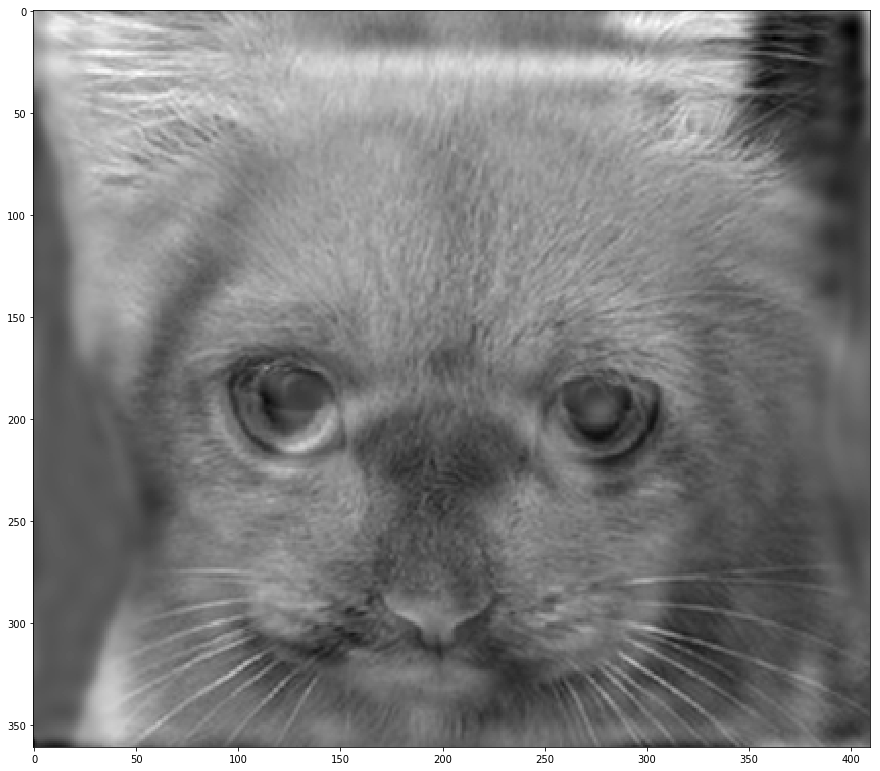

In [211]:
res = hybrid_image(images[6], 20, images[7], 20, ideal_filter)
fig = plt.figure(figsize=(15, 15))
plt.imshow(res, cmap='gray')